# **Trabajo Práctico Final - 2024 2C**

**Carrera**: Licenciatura en Ciencia de Datos

**Materia**: Introducción al Aprendizaje Automático

**Profesores/as**:
*   Esteban Roitberg
*   Luna Schteingart
*   Homero Lozza
*   Francisco González Bianco

**Integrantes**:
*   Federico Menicillo, fedemeni02@gmail.com
*   Lucas Golchtein, lucasgolchtein@gmail.com
*   Marcos Achaval, marcos.achavalr@gmail.com

# **Descripción del conjunto de datos**
Este [dataset](https://archive.ics.uci.edu/dataset/222/bank+marketing) contiene un historial de llamados telefónicos de campañas de marketing de un banco portugués. Estas campañas están basadas en llamados a los clientes y cada instancia del dataset representa a un cliente con algunas de sus características e información sobre el llamado telefónico. Como variable target, está definida una variable que contiene la información sobre si un cliente se suscribió o no a un plazo fijo del banco. El período del mismo es desde mayo del 2008 hasta noviembre del 2010.\
El dataset fue creado por: *Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) y Paulo Rita (ISCTE-IUL).*

*   Cantidad de filas = 45211
*   Cantidad de columnas = 17
*   Valores faltantes = 0
*   Tipos de datos por columna:

      1. **age**: numérica discreta (edad del cliente)

      2. **job**: categórica nominal (trabajo del cliente)

      3. **marital**: categórica nominal (estado civil del cliente)

      4. **education**: categórica ordinal (educación del cliente)

      5. **default**: categórica nominal (¿pago la deuda?)

      6. **balance**: numérica contínua (balance promedio anual del cliente en euros)

      7. **housing**: categórica nominal (¿tiene préstamo de vivienda?)

      8. **loan**: categórica nominal (¿tiene un préstamo activo?)

      9. **contact**: categórica nominal (tipo de llamada: "unknown", "telephone", "cellular")

      10. **day**: numérica discreta (último día en el que el cliente fue contactado)

      11. **month**: categórica ordinal (último mes en el que el cliente fue contactado)

      12. **duration**: numérica contínua (duración del llamado)

      13. **campaign**: numérica contínua (cantidad de llamados de la campaña hacia el mismo cliente)

      14. **pdays**: numérica contínua (cantidad de días desde el último llamado al cliente de la campañia anterior)

      15. **previous**: numérica contínua (cantidad de llamados realizados al cliente previos a la campaña actual)

      16. **poutcome**: categórica nominal (resultado de la campaña anterior)

      17. **y**: categórica binaria (¿el cliente se suscribió a un plazo fijo?)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
bank = pd.read_csv("bank+marketing/bank/bank-full.csv", sep=";")
print(bank.info())
print("\n----------------------------------------\n")
print(bank.describe())
print("\n----------------------------------------\n")
bank.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

----------------------------------------

                age        balance           day   

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Antes que nada, eliminamos la variable `duration`, ya que los creadores del conjunto de datos recomiendan eliminarla en caso de que queramos realizar modelos de predicción porque está extremadamente relacionada con el target `y`. Además, esta puede resultar en una variable "leak", ya que a la hora de predecir si un cliente se va a suscribir a un plazo fijo o no, no vamos a tener la duración de la llamada.

In [3]:
bank.drop("duration", axis=1, inplace=True, errors="ignore")

# **Descripción del problema a resolver**
Como objetivo de este trabajo práctico final, nos proponemos predecir si un cliente del banco se va a suscribir o no a un plazo fijo (target `y`). Esta predicción la vamos a llevar a cabo con un modelo de clasificación y este será evaluado con la métricas F1 Score. Decidimos no usar la exactitud, ya que nuestra muestra de datos está muy desbalanceada y sabemos que esta métrica no es precisa en estos casos.

*  Dado nuestro target propuesto, queremos encontrar dos o más atributos que tengan alta correlación con respecto al target y baja entre ellos. Para eso realizamos un mapa de calor (*heatmap*) para visualizar la matriz de correlación entre las variables de nuestro dataset.

*  Para realizar un *heatmap* es necesario cambiar los valores de las variables categóricas de tipo `string` (como por ejemplo `job`, `marital`, `education`, etc) a valores de tipo `int`. Pero antes, en el atributo `contact`, podemos reemplazar los valores `telephone` por `cellular` ya que este atributo tiene únicamente el 6.5% de sus observaciones con un contacto `telephone`. Haciendo esto, logramos simplificar este atributo y convertirlo en uno binario a costa de perder algo de información (aunque muy poca). Además, los atributos categóricos ordinales, como lo son `education` y `month`, tienen que respetar su orden a la hora de ser reemplazados por números.

In [4]:
pd.crosstab(bank["contact"], bank["y"])

y,no,yes
contact,,
cellular,24916,4369
telephone,2516,390
unknown,12490,530


In [5]:
bank["contact"] = bank["contact"].replace("telephone", "cellular")

In [6]:
categorical_cols = bank.select_dtypes(include="object").columns

for col in categorical_cols:
    if col == "education":
        education_map = {"unknown": 0, "primary": 1, "secondary": 2, "tertiary": 3}
        bank[col] = bank[col].map(education_map)
        print(f"{col}: {education_map}")
        continue

    if col == "month":
        months_map = {"jan": 0, "feb": 1, "mar": 2, "apr": 3, "may": 4, "jun": 5, "jul": 6, "aug": 7, "sep": 8, "oct": 9, "nov": 10, "dec": 11}
        bank[col] = bank[col].map(months_map)
        print(f"{col}: {months_map}")
        continue

    if len(bank[col].unique()) == 2 and bank[col].isin(["yes", "no"]).all():
        binary_map = {"yes": 1, "no": 0}
        bank[col] = bank[col].map(binary_map)
        print(f"{col}: {binary_map}")
        continue

    cols_unique = bank[col].unique()
    key_value_pairs = {valor: i for i, valor in enumerate(cols_unique)}
    print(f"{col}: {key_value_pairs}")
    bank[col] = bank[col].map(key_value_pairs)

job: {'management': 0, 'technician': 1, 'entrepreneur': 2, 'blue-collar': 3, 'unknown': 4, 'retired': 5, 'admin.': 6, 'services': 7, 'self-employed': 8, 'unemployed': 9, 'housemaid': 10, 'student': 11}
marital: {'married': 0, 'single': 1, 'divorced': 2}
education: {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
default: {'yes': 1, 'no': 0}
housing: {'yes': 1, 'no': 0}
loan: {'yes': 1, 'no': 0}
contact: {'unknown': 0, 'cellular': 1}
month: {'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5, 'jul': 6, 'aug': 7, 'sep': 8, 'oct': 9, 'nov': 10, 'dec': 11}
poutcome: {'unknown': 0, 'failure': 1, 'other': 2, 'success': 3}
y: {'yes': 1, 'no': 0}


In [7]:
bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,0,0,3,0,2143,1,0,0,5,4,1,-1,0,0,0
1,44,1,1,2,0,29,1,0,0,5,4,1,-1,0,0,0
2,33,2,0,2,0,2,1,1,0,5,4,1,-1,0,0,0
3,47,3,0,0,0,1506,1,0,0,5,4,1,-1,0,0,0
4,33,4,1,0,0,1,0,0,0,5,4,1,-1,0,0,0


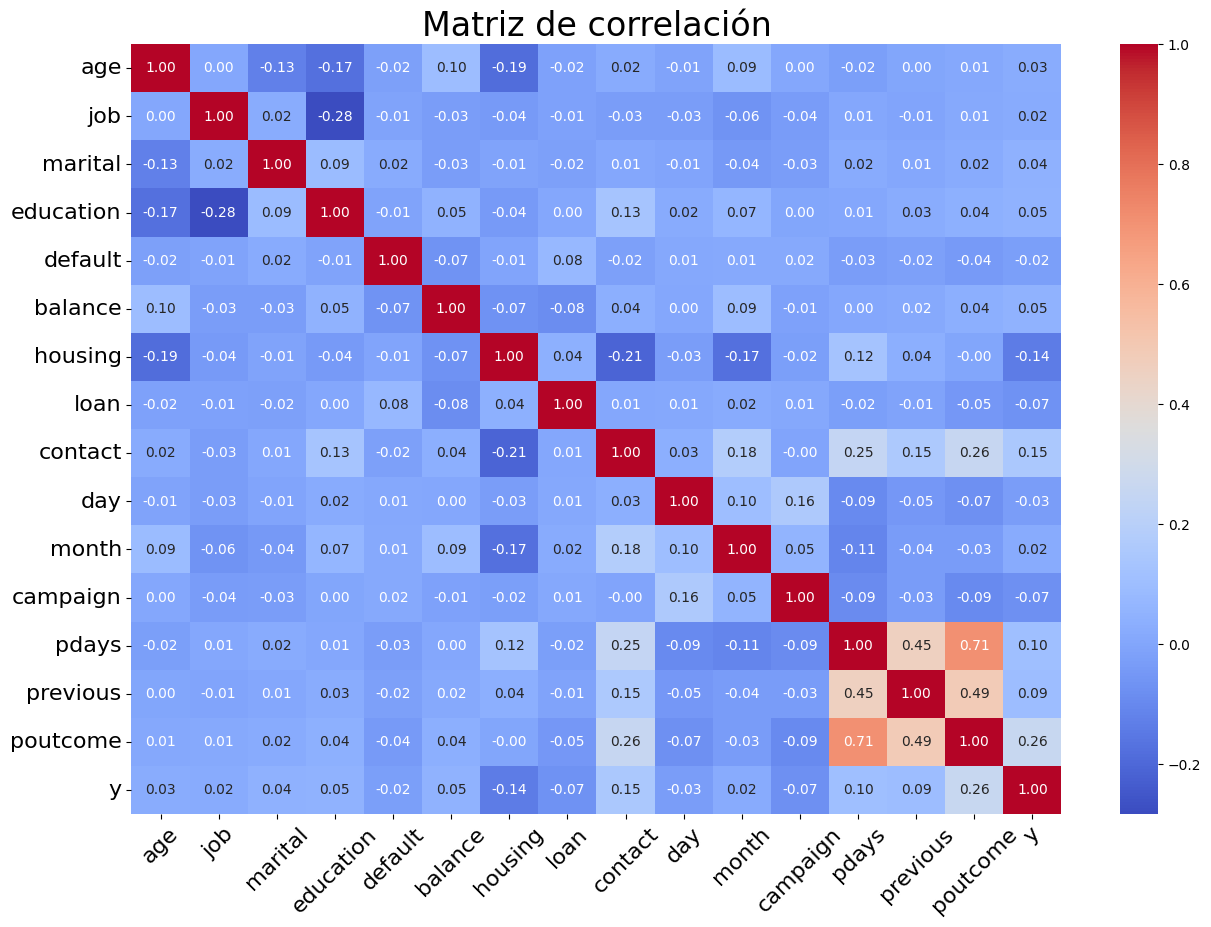

In [ ]:
data = bank.select_dtypes(include=np.number)
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación", fontsize=24)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Luego de hacer el mapa de calor, podemos deducir que las 3 variables que tienen mayor correlación con la variable target `y` son `poutcome`, `contact` y `housing`.

En el siguiente gráfico mostramos la relación entre `contact` y `poutcome` mediante un gráfico de dispersión coloreado por la variable target y aplicándole un ruido a las variables para una mejor visualización.

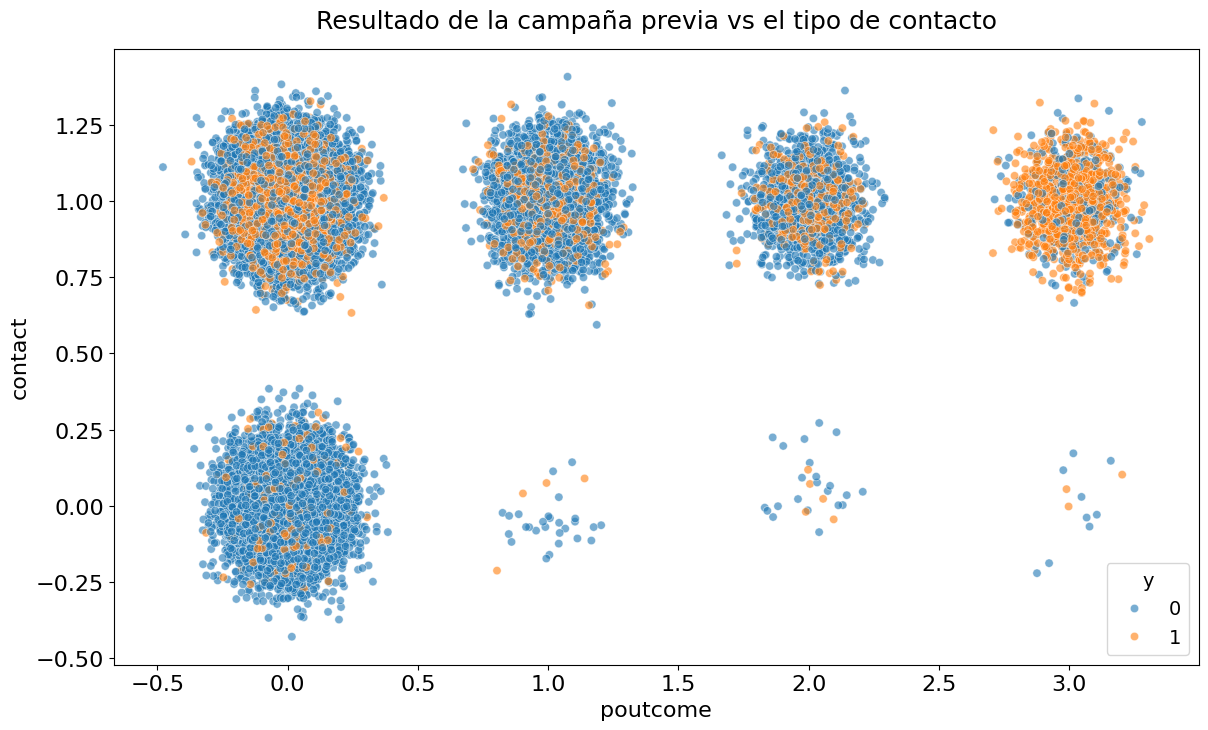

In [9]:
plt.figure(figsize=(14,8))
jpoutcome = bank["poutcome"] + 0.1 * np.random.normal(size=len(bank["poutcome"]))
jcontact = bank["contact"] + 0.1 * np.random.normal(size=len(bank["contact"]))
sns.scatterplot(bank, x = jpoutcome, y = jcontact, hue = "y", alpha=0.6)
plt.title("Resultado de la campaña previa vs el tipo de contacto", fontsize=18, y=1.02)
plt.xlabel("poutcome", fontsize=16)
plt.ylabel("contact", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title="y", title_fontsize=14, fontsize=14)
plt.show()

In [10]:
pd.DataFrame(bank[bank["poutcome"] == 3].value_counts(["contact", "y"])).sort_values("contact")

count
contact y       
0       0      9
        1      3
1       1    975
        0    524

En el gráfico de dispersión anterior podemos notar que los clientes que se suscribieron a un plazo fijo en la campaña anterior (`poutcome` = 3), la mayoría de ellos se suelen suscribir nuevamente en la campaña actual. También se puede ver en la tabla de arriba que muestra la diferencia entre la clase positiva y negativa agrupada por tipo de contacto. En este caso no podemos destacar ningún patrón interesante con el atributo `contact`. Únicamente, vemos que las instancias que no se sabe su tipo de contacto son la minoría.

Además, generamos otro gráfico de dispersión para ver la relación entre la variable `housing` y `poutcome` coloreado por `y`. Al igual que en el gráfico anterior, se les agregó ruido a las variables para visualizarlas mejor.

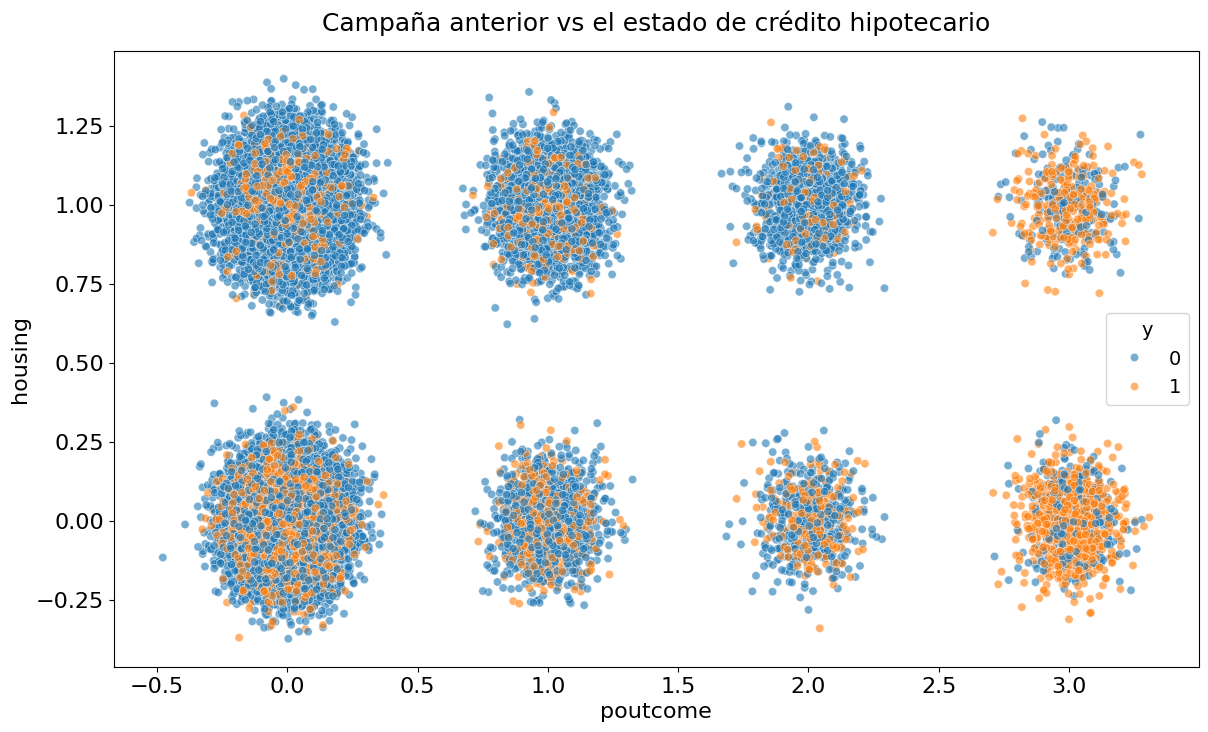

In [11]:
plt.figure(figsize=(14,8))
jhousing = bank["housing"] + 0.1 * np.random.normal(size=len(bank["housing"]))
sns.scatterplot(bank, x = jpoutcome, y = jhousing, hue = "y", alpha=0.6)
plt.title("Campaña anterior vs el estado de crédito hipotecario", fontsize=18, y=1.02)
plt.xlabel("poutcome", fontsize=16)
plt.ylabel("housing", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title="y", title_fontsize=14, fontsize=14)
plt.show()

In [12]:
pd.DataFrame(bank[bank["poutcome"] == 3].value_counts(["housing", "y"])).sort_values("housing"), pd.DataFrame(bank[bank["poutcome"] == 1].value_counts(["housing", "y"])).sort_values("housing")

(           count
 housing y       
 0       1    729
         0    311
 1       1    249
         0    222,
            count
 housing y       
 0       0   1101
         1    330
 1       0   3182
         1    288)

De los que se suscribieron a un plazo fijo en la campaña anterior (`poutcome` = 3), si miramos únicamente a los que no tienen un crédito hipotecario (`housing` = 0), más del 50% de ellos se vuelve a suscribir nuevamente a un plazo fijo en la campaña actual. Mientras que en los que tienen un crédito hipotecario no hay mucha diferencia en el atributo `y`, aproximadamente de todos ellos un 50% se suscribe nuevamente y el otro 50% lo contrario. <br> En el caso de los que no se suscribieron en la campaña anterior (`poutcome` = 1), en las dos categorías de housing predominan los que no se suscribieron a un plazo fijo. En otras palabras, indiferentemente de si el cliente tiene un crédito hipotecario o no, la mayoría de esos clientes no se suscribe a un plazo fijo en la actual campaña (mirar tablas de arriba).

A continuación, dejamos un gráfico que muestra la relación entre los atributos con mayor correlación con el target. Esto nos va a ayudar a identificar patrones y relaciones entre atributos para una mejor elección del modelo a utilizar.

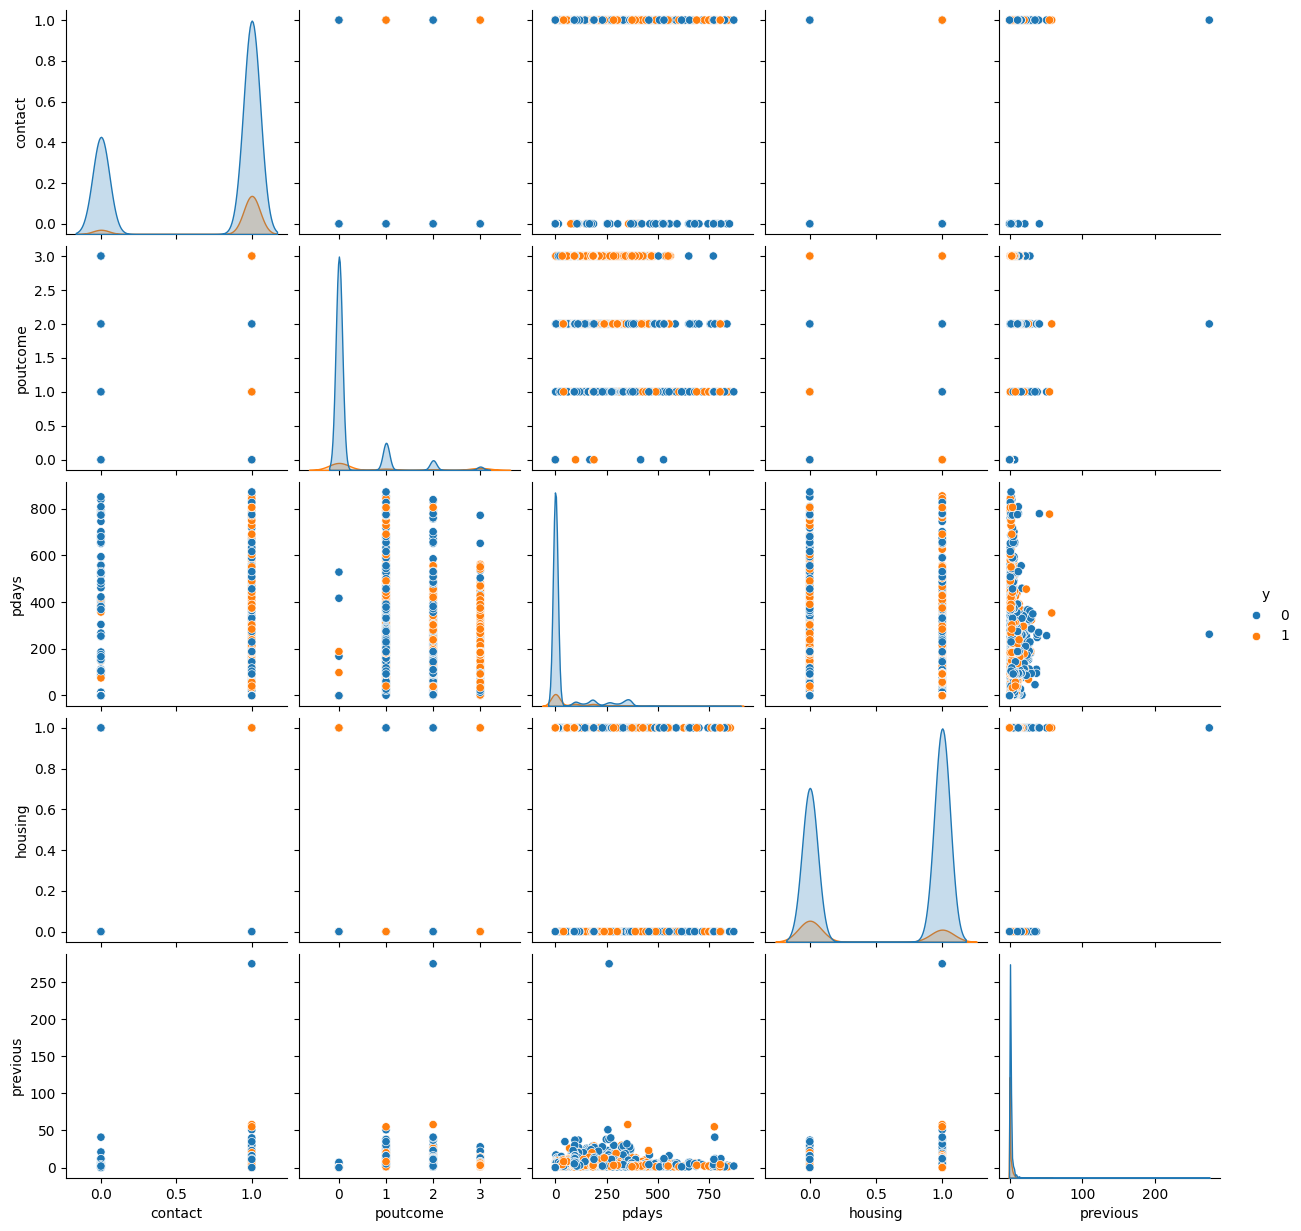

In [13]:
sns.pairplot(bank[["contact", "poutcome", "pdays", "housing", "previous", "y"]], hue="y")
plt.show()

### **Balance de la muestra**

Veamos la proporción de cada clase en la variable target `y`.

In [14]:
proporciones = {
    "Target": bank["y"].value_counts().index,
    "Cantidad": bank["y"].value_counts().values,
    "%": (bank["y"].value_counts(normalize=True) * 100).round(0).astype(int).values
}

pd.DataFrame(proporciones).reset_index(drop=True)

,Target,Cantidad,%
0,0,39922,88
1,1,5289,12


Podemos notar que la muestra está considerablemente desbalanceada. 88 % de los datos de la muestra pertenecen a la clase *negativa*, mientras que el 12 % restante pertenece a la clase *positiva*. Es importante tener esto en cuenta para el resto del trabajo práctico, ya que es información clave para la evaluación de los modelos y para el ajuste de sus diferentes hiperparámetros.

# **Preprocesamiento de Datos**

Analicemos si hay valores atípicos ("*outliers*") en las variables que originalmente eran continuas de tipo `int`.

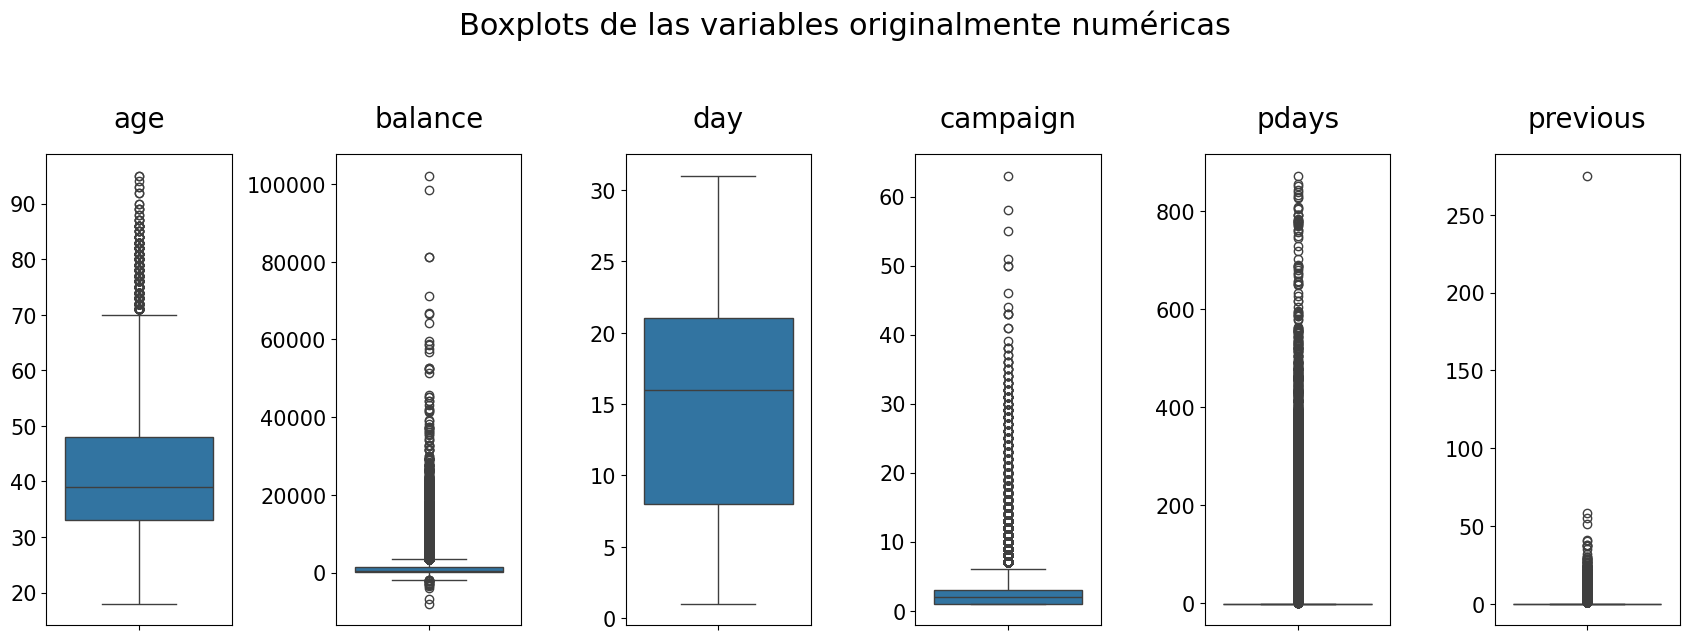

In [15]:
fig, axs = plt.subplots(1, 6, figsize=(17, 6))

for i, col in enumerate(bank[["age", "balance", "day", "campaign", "pdays", "previous"]]):
    sns.boxplot(data=bank[["age", "balance", "day", "campaign", "pdays", "previous"]], y=col, ax=axs[i])
    axs[i].set_title(f"{col}", fontsize=20, y=1.04)
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")
    axs[i].tick_params(axis="y", labelsize=15)

plt.suptitle("Boxplots de las variables originalmente numéricas", fontsize = 22, y=1.06)
plt.tight_layout()
plt.show()

Podemos observar que el atributo `previous` tiene un valor que se aleja significativamente de la distribución central (*outlier univariante*). Consideramos tan grande ese alejamiento que creemos que no hace falta analizar a ese dato en particular. Entonces directamente decidimos eliminar esa instancia completa.

In [16]:
bank.drop(bank[bank["previous"] == 275].index, inplace=True)
bank.nlargest(10, "previous")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
38326,46,3,0,1,0,1085,1,1,1,15,4,2,353,58,2,1
44089,37,1,0,2,0,432,1,0,1,6,6,3,776,55,1,1
28886,31,0,1,3,0,358,1,0,1,30,0,3,256,51,1,0
44822,27,3,0,2,0,821,1,1,0,16,8,1,778,41,2,0
42611,35,1,1,2,0,4645,1,0,1,11,0,3,270,40,2,0
28498,49,0,1,3,0,145,1,0,1,29,0,2,248,38,1,0
37567,39,0,0,3,0,0,1,0,1,14,4,15,261,38,1,0
26668,51,2,0,2,0,653,1,0,1,20,10,9,112,37,2,0
42422,27,11,1,2,0,91,0,0,1,4,11,6,95,37,2,0
44484,28,0,1,3,0,6791,0,0,1,9,7,1,46,35,1,0


El atributo `balance` tiene dos instancias candidatas a ser valores atípicos, pero al no ser tan significativo el alejamiento, necesitamos hacer un análisis específico a la instancia completa de esos dos valores. Esto nos va a permitir observar otras características del cliente de esas instancias y determinar si tiene un balance atípico o no.

In [17]:
bank.nlargest(10, "balance")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
39989,51,0,1,3,0,102127,0,0,1,3,5,1,-1,0,0,0
26227,59,0,0,3,0,98417,0,0,1,20,10,5,-1,0,0,0
42558,84,5,0,2,0,81204,0,0,1,28,11,1,313,2,2,1
43393,84,5,0,2,0,81204,0,0,1,1,3,1,94,3,3,1
41693,60,5,0,1,0,71188,0,0,1,6,9,1,-1,0,0,0
19785,56,0,2,3,0,66721,0,0,1,8,7,2,-1,0,0,0
21192,52,3,0,1,0,66653,0,0,1,14,7,3,-1,0,0,0
19420,59,6,0,0,0,64343,0,0,1,6,7,4,-1,0,0,0
41374,32,2,1,3,0,59649,0,0,1,1,8,2,-1,0,0,0
12926,56,3,0,2,0,58932,0,0,1,7,6,2,-1,0,0,0


Decidimos **no** clasificarlos como valores atípicos, ya que por sus edades, tipo de trabajo (`management`) y educación (título terciario) es posible que obtengan ese patrimonio.

Por último, nos fijamos si los atributos tienen valores negativos o mínimos que sean atípicos o ilógicos. El único atributo que nos llamó la atención fue `balance`, ya que es raro que un cliente tenga un balance negativo. Sin embargo, puede ocurrir cuando el cliente está endeudado con el banco.
El valor negativo en el atributo `pdays` es correcto, ya que ese valor significa que el cliente nunca fue contactado anteriormente, un hecho tranquilamente posible.

In [ ]:
pd.DataFrame(bank[["age", "balance", "day", "campaign", "pdays", "previous"]].min())

,0
age,18
balance,-8019
day,1
campaign,1
pdays,-1
previous,0


# **Modelado**

Esta etapa la decidimos llevar a cabo con un **árbol de decisión**. Decidimos utilizar este tipo de modelo, ya que, a diferencia de la **regresión logística**, los árboles de decisión son más robustos ante muestras desbalanceadas y con atributos que no están linealmente relacionados. Para muestras desbalanceadas, `DecisionTreeClassifier` incluye un parámetro `class_weight` que le asigna un mayor peso (importancia) a la clase minoritaria. En nuestro caso particular, se le asigna más peso a la clase positiva. Además, este tipo de modelo ofrece una función `feature_importance` que determina el poder predictivo de cada atributo y esto ayuda mucho a la hora de decidir qué atributos usar en el modelo y a seleccionar únicamente a los más predictores para evitar un sobre ajuste. <br> Cabe destacar que para evaluar cada modelo que hagamos durante toda esta etapa, nuestra clase de interés va a ser la clase *positiva* (la minoritaria). Vamos a concentrarnos en mejorar nuestros modelos a base de las predicciones de la clase de interés y su rendimiento respecto del **F1 Score** para obtener un modelo robusto para predecir si un cliente se va a suscribir o no a un plazo fijo. Hemos elegido basarnos en esta métrica, ya que combina la `exhaustividad` (recall) y la `presicion`, dos métricas apropiadas para la evaluación de nuestros modelos. Además, sabiendo que nuestra muestra está altamente desbalanceada, el `F1-Score` es una buena opción para estos casos.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import RFE

#### **Train-Test Split**

In [20]:
X = bank.drop("y", axis=1)
y = bank["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### **Benchmark**

Comenzamos con un modelo <DummyClassifier> que asigna valores al azar respetando la proporción original de la muestra. Por ejemplo, nuestra muestra que contiene el 88 % de los datos como clase **negativa** y el 12 % restante como clase **positiva**, el `DummyClassifier` asigna valores de clase (etiquetas) al azar y luego, la proporción de clases de la predicción va a ser similar a la original (88/12).

In [ ]:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)

y_test_pred_bench = dummy_clf.predict(X_test)
f1_score_bench = f1_score(y_test, y_test_pred_bench)

print(f"F1 Score = {round(f1_score_bench, 2)}")

F1 Score = 0.12


Podemos ver que el desempeño del benchmark es bajo, algo totalmente esperado. El resto de los modelos van a ser evaluados y comparados respecto de este. 

#### **Primer Modelo**

Como siguiente paso, nos proponemos realizar un primer modelo simple con un **árbol de decisión** de profundidad 2. Elegimos las 2 variables que tienen más correlación con el target, pero cero correlación entre ellas. Las variables son: `poutcome` y `housing`

In [ ]:
clf = DecisionTreeClassifier(max_depth=2, random_state=42, class_weight="balanced")

cv = cross_validate(clf, X_train[["poutcome", "housing"]], y_train, cv=5, scoring="f1", return_train_score=True)

print(f"F1-Score (train): {round(cv["train_score"].mean(), 2)} ± {round(np.std(cv["train_score"]), 2)}")
print(f"F1-Score (test): {round(cv["test_score"].mean(), 2)} ± {round(np.std(cv["test_score"]), 2)}")

F1-Score (train): 0.28 ± 0.0
F1-Score (test): 0.28 ± 0.0


Podemos observar una mejora significativa en el `F1-Score` con respecto del benchmark. Además, como este modelo es simple, mirando la igualdad de rendimiento en entrenamiento y evaluación de la validación cruzada, podemos afirmar que este modelo está sub ajustando y tiene un alto sesgo.

A continuación presentamos una gráfica de la frontera de decisión de este árbol. Sin embargo, como se trata de dos atributos categóricos, el gráfico no brinda una clara interpretación.

In [23]:
def visualize_classifier(model, X, y, ax=None, proba=False, jitter_amount=0.05):
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values
    ax = ax or plt.gca()

    colors_tab10 = plt.cm.tab10.colors

    np.random.seed(42)
    X_jittered = X + jitter_amount * np.random.normal(size=X.shape)

    unique_classes = np.unique(y)
    for i, y_value in enumerate(reversed(unique_classes)):
        ax.scatter(X_jittered[y == y_value, 0], X_jittered[y == y_value, 1], s=30,
                   zorder=3, alpha=0.2, color=colors_tab10[i], label=y_value)

    ax.legend(title="Clases", loc="best", fontsize=14, title_fontsize=14)
    ax.axis("tight")
    plt.title("Frontera de decisión", fontsize=18)
    ax.set_xlabel("poutcome", fontsize=16)
    ax.set_ylabel("housing", fontsize=16)

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))

    if proba:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    Z = -Z + 1
    ax.pcolormesh(xx, yy, Z, cmap="bwr", vmin=0, vmax=1, alpha=0.2)

    ax.set(xlim=xlim, ylim=ylim)

c:\Users\marqu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


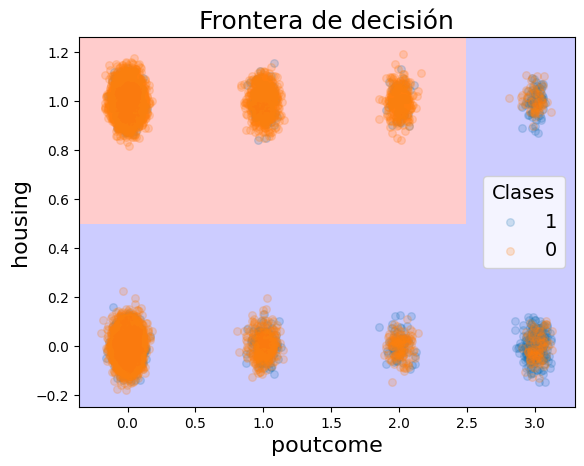

In [24]:
visualize_classifier(clf.fit(X_train[["poutcome", "housing"]], y_train), X_test[["poutcome", "housing"]], y_test)

#### **Segundo modelo**

Como segundo modelo, decidimos entrenar otro **árbol de decisión,** pero en este caso lo entrenamos con los 5 atributos más importantes usando **Recursive Feature Elimination (RFE)**. Esta técnica entrena múltiples árboles de decisión y en cada iteración elimina el atributo menos importante (mediante el nivel de reducción de impurezas del árbol) hasta llegar a la cantidad de atributos deseada. Esto nos va a ayudar a reducir la complejidad del modelo, excluyendo información que no aporta a las predicciones y manteniendo solo la más valiosa y con alto poder predictivo.

In [25]:
clf2 = DecisionTreeClassifier(random_state=42, class_weight="balanced")
rfe = RFE(estimator=clf2, n_features_to_select=5)
rfe.fit(X_train, y_train)

feature_names = X_train.columns
selected_features = feature_names[rfe.support_]
pd.DataFrame({"Atributo": selected_features})

,Atributo
0,age
1,job
2,balance
3,day
4,poutcome


Luego queremos encontrar la profundidad óptima del **árbol de decisión** evaluando el `F1 Score` con **Validación Cruzada** tanto en su conjunto de entrenamiento como en el de validación, a medida que aumenta la complejidad del modelo (profundidad). Vamos a prestar atención a las zonas de alto sesgo y varianza y determinar la mejor profundidad en donde el modelo presenta un equilibro entre esto dos factores.

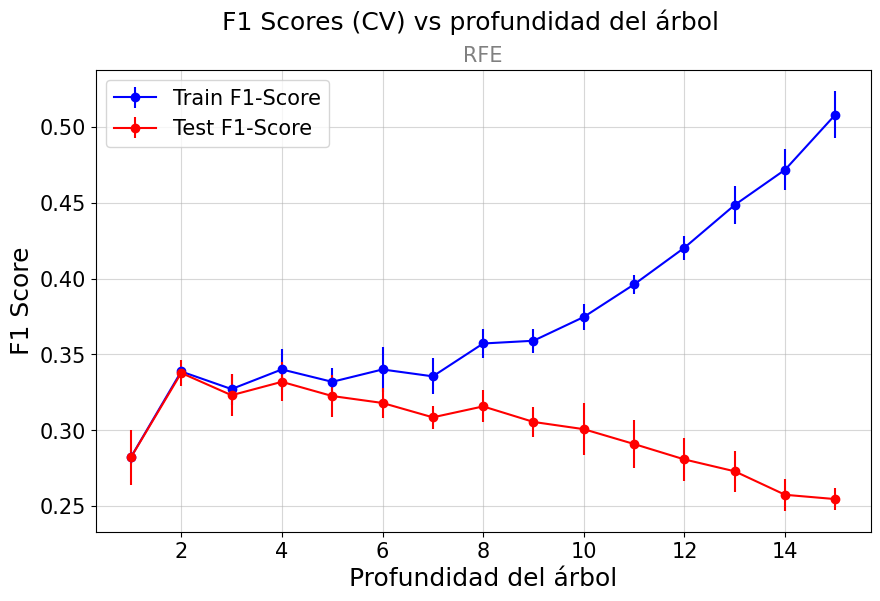

In [26]:
max_depths = range(1, 16)
f1_scores_train = []
std_error_train = []
f1_scores_test = []
std_error_test = []

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42, class_weight="balanced")
    
    cv_results = cross_validate(clf, X_train[selected_features], y_train, cv=5, scoring="f1", return_train_score=True)
    
    f1_scores_train.append(np.mean(cv_results["train_score"]))
    f1_scores_test.append(np.mean(cv_results["test_score"]))

    std_error_train.append(np.std(cv_results["train_score"]))
    std_error_test.append(np.std(cv_results["test_score"]))

plt.figure(figsize=(10, 6))
plt.errorbar(max_depths, f1_scores_train, yerr=std_error_train, fmt="o-", color="b", label="Train F1-Score")
plt.errorbar(max_depths, f1_scores_test, yerr=std_error_test, fmt="o-", color="r", label="Test F1-Score")

plt.suptitle("F1 Scores (CV) vs profundidad del árbol", fontsize=18)
plt.title("RFE", fontsize=15, color="grey")
plt.xlabel("Profundidad del árbol", fontsize=18)
plt.ylabel("F1 Score", fontsize=18)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True, alpha=0.5)
plt.show()

Consideramos que la mejor profundidad es 2, ya que es la que obtiene un F1 Score más alto en validación y un similar rendimiento en entrenamiento. A partir de profundidad 8 vemos que el rendimiento de entrenamiento empieza a aumentar, mientras que el de validación empieza a disminuir. Por lo tanto, en este punto el árbol empieza a sobre ajustar y a aumentar su varianza. Es muy probable que si entrenamos este árbol con profundidad 12 (por ejemplo), su frontera de decisión va a cambiar mucho a medida que se entrena con diferentes conjuntos de datos (submuestras).

Luego queremos analizar cuánto cambia el rendimiento del modelo si usamos los 5 atributos que tienen mayor correlación con el target sin importar la correlación entre ellos. Veamos qué sucede.

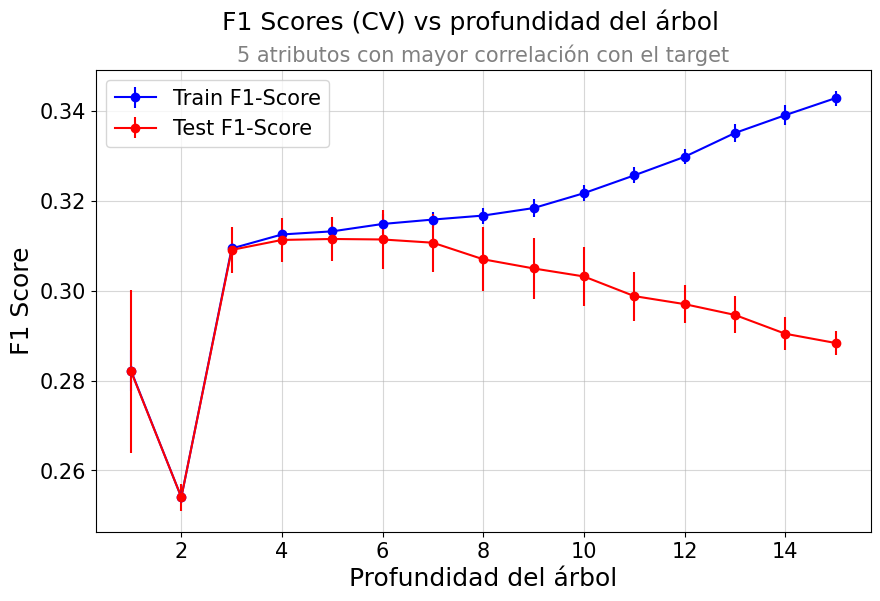

In [27]:
max_depths = range(1, 16)
f1_scores_train = []
std_error_train = []
f1_scores_test = []
std_error_test = []

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42, class_weight="balanced")
    
    cv_results = cross_validate(clf, X_train[["poutcome", "contact", "housing", "pdays", "previous"]], y_train, cv=5, scoring="f1", return_train_score=True)
    
    f1_scores_train.append(np.mean(cv_results["train_score"]))
    f1_scores_test.append(np.mean(cv_results["test_score"]))

    std_error_train.append(np.std(cv_results["train_score"]))
    std_error_test.append(np.std(cv_results["test_score"]))

plt.figure(figsize=(10, 6))
plt.errorbar(max_depths, f1_scores_train, yerr=std_error_train, fmt="o-", color="b", label="Train F1-Score")
plt.errorbar(max_depths, f1_scores_test, yerr=std_error_test, fmt="o-", color="r", label="Test F1-Score")

plt.suptitle("F1 Scores (CV) vs profundidad del árbol", fontsize=18)
plt.title("5 atributos con mayor correlación con el target", fontsize=15, color="grey")
plt.xlabel("Profundidad del árbol", fontsize=18)
plt.ylabel("F1 Score", fontsize=18)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True, alpha=0.5)
plt.show()

Observamos que los rendimientos obtenidos con este modelo son más bajos que los del modelo anterior. 

Analizando las correlaciones entre las variables utilizadas en este modelo y en el anterior, notamos que los atributos elegidos con RFE (feature importance) tienen correlaciones entre ellos de entre 0 y 0.1 (poca correlación). Mientras que los atributos que tienen mayor correlación con el target, presentan correlaciones entre ellos de entre 0 y 0.71 con la mayoría por encima de 0.2. Creemos que los atributos que menos se correlacionan entre sí, son mejores predictores porque le brindan más variedad de información al modelo. En otras palabras, si dos atributos están altamente correlacionados, brindan casi la misma información.

*Estos resultados se pueden visualizar en la matriz de correlación del comienzo.*

A continuación trataremos de encontrar mejores `hiperparámetros` (inclusive la profundidad) para optimizar el modelo que utiliza los 5 atributos más importantes y obtener un mejor desempeño. Primero vamos a llevar a cabo un **Randomized Search** con validación cruzada para obtener un rango de valores acotado de cada hiperparámetro y luego evaluarlos con **Grid Search**.

In [28]:
params_tree_rand = {
    "max_depth": [1,2,3,4,5,6,7,8,9,10],
    "min_samples_split": [1,2,3,4,5],
    "min_samples_leaf": [1,2,3,4,5],
    "max_features": ["auto", "sqrt", "log2", None],
    "splitter": ["best", "random"],
    "max_leaf_nodes": [None,10,20],
    "min_weight_fraction_leaf": [0.0,0.01,0.05,0.1],
    "min_impurity_decrease": [0.0,0.001,0.01,0.1]
}

random_search_tree = RandomizedSearchCV(clf2, params_tree_rand, n_iter=1000, cv=5, random_state=42, scoring="f1", return_train_score=True)
random_search_tree.fit(X_train[selected_features], y_train)

print(f"Mejores parámetros: {random_search_tree.best_params_}")

max_index_train = np.nanargmax(random_search_tree.cv_results_["mean_train_score"])
print(f"Mejor F1 Score (train): {round(random_search_tree.cv_results_["mean_train_score"][max_index_train], 3)} ± {round(random_search_tree.cv_results_["std_train_score"][max_index_train], 3)}")

max_index_test = np.nanargmax(random_search_tree.cv_results_["mean_test_score"])
print(f"Mejor F1 Score (test): {round(random_search_tree.cv_results_["mean_test_score"][max_index_test], 3)} ± {round(random_search_tree.cv_results_["std_test_score"][max_index_test], 3)}")

Mejores parámetros: {'splitter': 'best', 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 3, 'min_samples_leaf': 5, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': None, 'max_features': 'log2', 'max_depth': 3}
Mejor F1 Score (train): 0.354 ± 0.005
Mejor F1 Score (test): 0.354 ± 0.02


c:\Users\marqu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
2070 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
830 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\marqu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\marqu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\marqu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ba

Evaluamos un rango de valores más acotado de cada hiperparámetro (proveniente del Randomized Search) mediante Grid Search con validación cruzada.

In [29]:
params_tree_grid = {
    "max_depth": [2,3,4],
    "min_samples_split": [3,4,5],
    "min_samples_leaf": [3,4,5],
    "max_features": ["auto", "sqrt", "log2", None],
    "splitter": ["best", "random"],
    "max_leaf_nodes": [None,10,20],
    "min_weight_fraction_leaf": [0.0,0.01,0.05],
    "min_impurity_decrease": [0.0,0.001,0.01]
}

grid_search_tree = GridSearchCV(clf2, params_tree_grid, cv=5, scoring="f1", n_jobs=-1, return_train_score=True)
grid_search_tree.fit(X_train[selected_features], y_train)

print(f"Mejores parámetros: {grid_search_tree.best_params_}")

max_index_train = np.nanargmax(grid_search_tree.cv_results_["mean_train_score"])
print(f"Mejor F1 Score (train): {round(grid_search_tree.cv_results_["mean_train_score"][max_index_train], 3)} ± {round(grid_search_tree.cv_results_["std_train_score"][max_index_train], 3)}")

max_index_test = np.nanargmax(grid_search_tree.cv_results_["mean_test_score"])
print(f"Mejor F1 Score (test): {round(grid_search_tree.cv_results_["mean_test_score"][max_index_test], 3)} ± {round(grid_search_tree.cv_results_["std_test_score"][max_index_test], 3)}")

c:\Users\marqu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
7290 fits failed out of a total of 29160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3624 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\marqu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\marqu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\marqu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\

Mejores parámetros: {'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.01, 'splitter': 'best'}
Mejor F1 Score (train): 0.355 ± 0.005
Mejor F1 Score (test): 0.354 ± 0.02


c:\Users\marqu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.28206229 0.30814008 0.28206229]
  warnings.warn(
c:\Users\marqu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan ... 0.28221399 0.31447005 0.28221399]
  warnings.warn(


El modelo optimizado tiene `F1 Scores` muy parecidos tanto en los conjuntos de entrenamiento como de validación, demostrando que es consistente y que no está sobre ajustando.

Finalmente, evaluamos al modelo optimizado en la muestra de validación para observar cómo se comporta con una muestra de datos totalmente desconocida.

In [30]:
clf2 = DecisionTreeClassifier(max_depth=3, max_features="sqrt", max_leaf_nodes=None, min_impurity_decrease=0.0, 
                              min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.01, splitter="best", 
                              random_state=42, class_weight="balanced")
clf2.fit(X_test[selected_features], y_test)
y_preds = clf2.predict(X_test[selected_features])

print(f"F1 Score: {round(f1_score(y_test, y_preds).mean(), 3)}")

F1 Score: 0.364


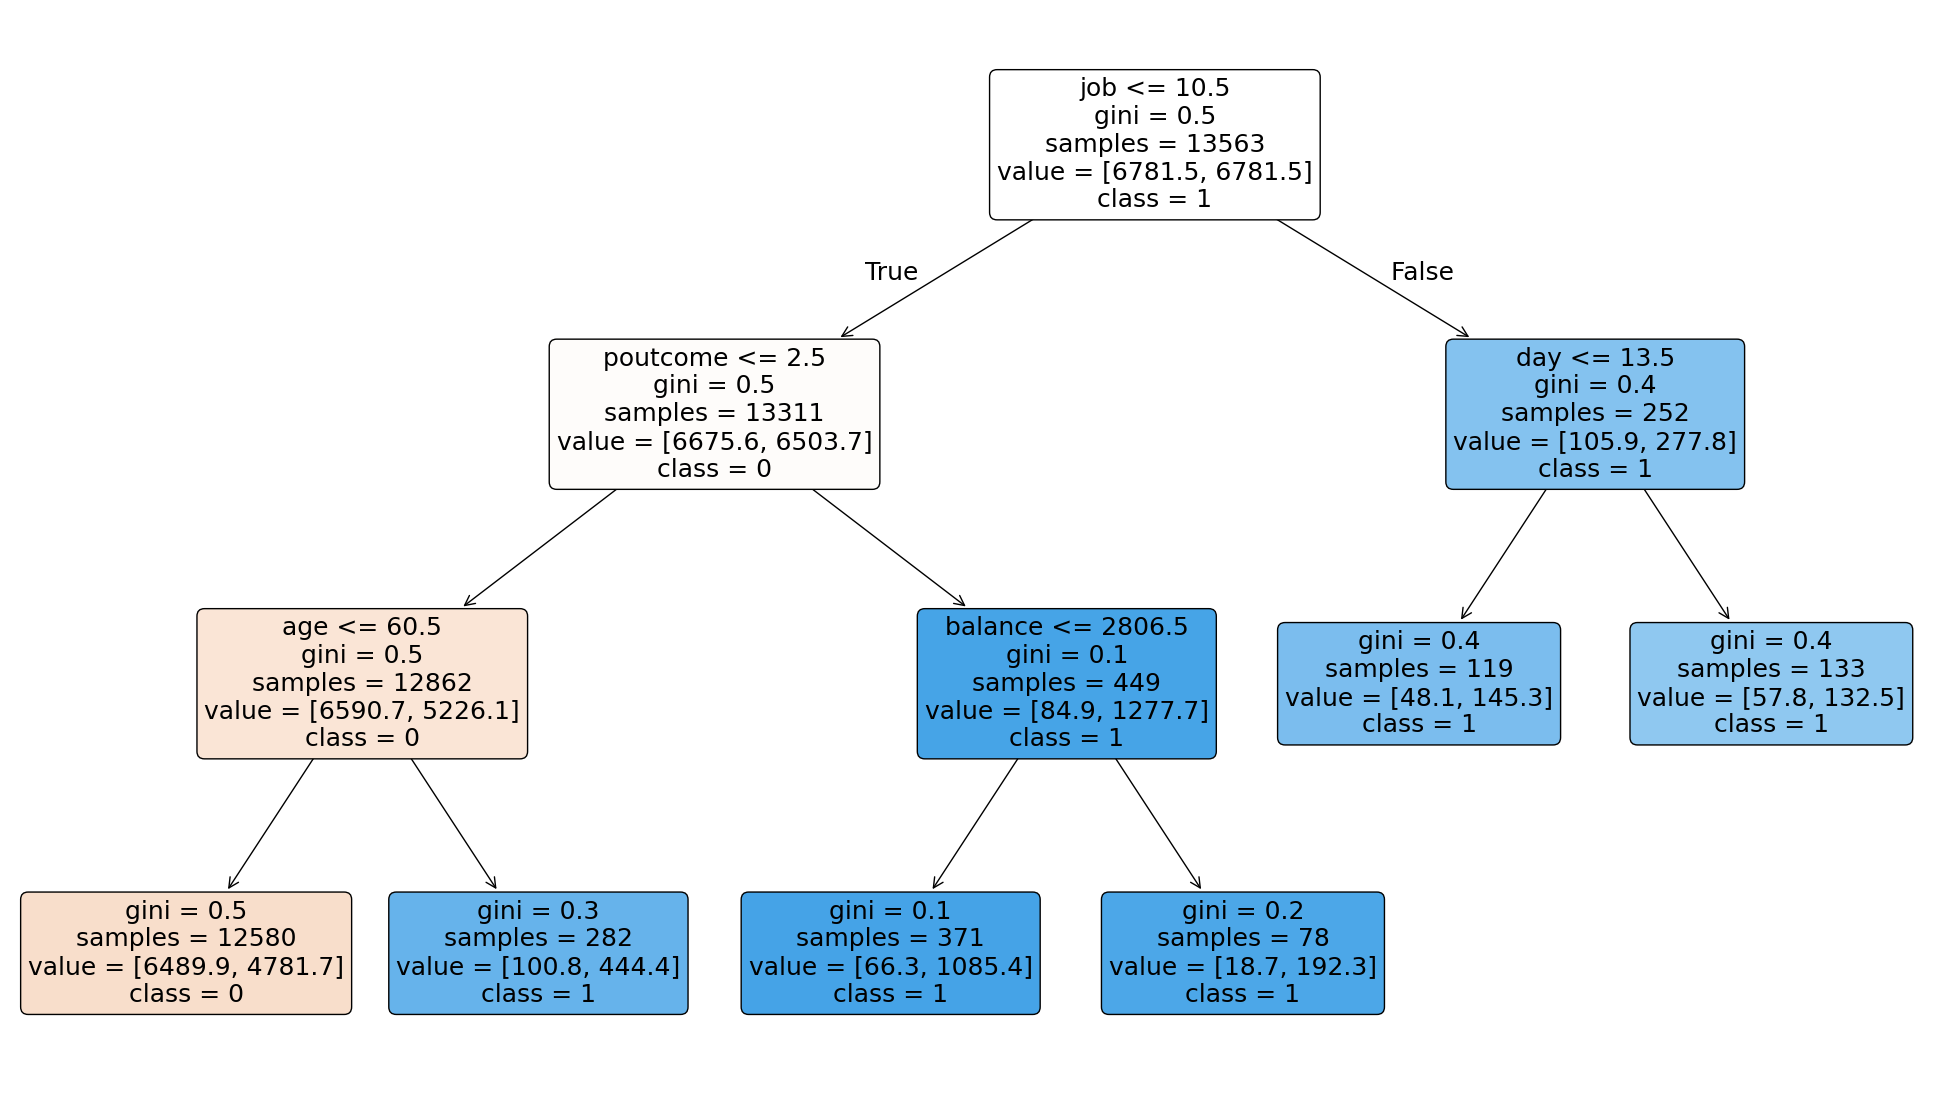

In [ ]:
plt.figure(figsize=(25, 14))
plot_tree(clf2, feature_names=X_test[selected_features].columns, class_names=[str(cla) for cla in clf2.classes_], filled=True, impurity=True, rounded=True, precision=1, fontsize=18)
plt.show()

El modelo mantuvo el rendimiento que tenía en la muestra de entrenamiento e incluso lo mejoró. <br> Finalmente, decidimos predecir con este modelo, ya que a pesar del desbalance de la muestra y su error irreducible (ruido), este logra satisfacer nuestros requerimientos mínimos para predecir si un cliente se suscribirá o no a un plazo fijo.

#### **Random Forest**

Para finalizar con nuestro trabajo práctico, decidimos entrenar un modelo **Random Forest** y comparar su rendimiento con el modelo final. Nos gustaría saber qué rendimiento obtiene un modelo de ensamble y más complejo que el que hicimos anteriormente y finalmente comparar los resultados.

Primero creamos al clasificador y optimizamos sus hiperparámetros con Randomized Search y validación cruzada.

In [32]:
params_rf_rand = {
    "max_depth": [1,2,3,4,5,6],
    "min_samples_split": [15,20,25,30,35,40],
    "min_samples_leaf": [5,10,15,20,25],
    "max_features": ["auto", "sqrt", "log2", None],
    "bootstrap": [True, False],
    "max_leaf_nodes": [None,10,20,30],
    "min_weight_fraction_leaf": [0.0,0.01,0.05,0.1],
    "min_impurity_decrease": [0.0,0.001,0.01,0.1],
    "n_estimators": [80,100,120,140,160,180,200,220,300]
}

clf3 = RandomForestClassifier(n_jobs=-1, random_state=42, class_weight="balanced")

random_search_rf = RandomizedSearchCV(clf3, params_rf_rand, n_iter=100, cv=5, random_state=42, scoring="f1", return_train_score=True)
random_search_rf.fit(X_train[selected_features], y_train)

print(f"Mejores parámetros: {random_search_rf.best_params_}")

max_index_train = np.nanargmax(random_search_rf.cv_results_["mean_train_score"])
print(f"Mejor F1-Score (train): {round(random_search_rf.cv_results_["mean_train_score"][max_index_train], 2)} ± {round(random_search_rf.cv_results_["std_train_score"][max_index_train], 2)}")

max_index_test = np.nanargmax(random_search_rf.cv_results_["mean_test_score"])
print(f"Mejor F1-Score (test): {round(random_search_rf.cv_results_["mean_test_score"][max_index_test], 2)} ± {round(random_search_rf.cv_results_["std_test_score"][max_index_test], 2)}")

c:\Users\marqu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
125 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\marqu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\marqu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\marqu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base

Mejores parámetros: {'n_estimators': 300, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 30, 'min_samples_leaf': 15, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 30, 'max_features': 'log2', 'max_depth': 4, 'bootstrap': True}
Mejor F1-Score (train): 0.37 ± 0.0
Mejor F1-Score (test): 0.36 ± 0.02


#### **Comparación de modelos**

*Segundo modelo (árbol más complejo) y Benchmark*:
* El benchmark obtuvo un F1 Score de 0.11, mientras que el árbol más complejo obtuvo un F1 Score de 0.35 ± 0.02. Claramente, el modelo elegido rinde mejor que el benchmark y para nuestro caso de estudio es el más adecuado.

*Segundo modelo (árbol más complejo) y Random Forest*:
* El random forest obtuvo un F1 Score igual a 0.36 ± 0.02. Este resultado es prácticamente igual al que obtuvo el modelo más complejo. Por lo tanto, creemos que en general el modelo más adecuado entre estos dos es el elegido, ya que es un modelo más simple, más fácil de interpretar y más barato computacionalmente respecto del random forest y logra predecir igual de bien.

#### **Conclusión**

Finalmente, logramos obtener un modelo que es mejor que el resto de los que entrenamos y que mantiene un equilibrio entre el sesgo y la varianza sin presentar señales de sobre ajuste. Sin embargo, estamos dispuestos a desarrollar nuevas tareas para mejorar aún más el resultado de nuestras predicciones. Podemos nombrar tales como técnicas para balancear la muestra de datos (undersampling o oversampling), probar modelos como el XGBoost y desarrollar evaluaciones de modelos con el área bajo la curva de precisión-exhaustividad (PR-AUC).